In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data 102 Final Project

## EDA

In [2]:
zero_mappings = {'no', 'No', 'NaN'}
one_mappings = {'yes', 'Yes'}
def transform_binary(entry):
    if pd.isnull(entry):
        return 0
    elif entry in zero_mappings:
        return 0
    elif entry in one_mappings:
        return 1
    return entry

def transform_binary_column(col):
    return [transform_binary(x) for x in col]

In [3]:
dem_data = pd.read_csv("./election_data/dem_candidates.csv")
dem_data.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dem_data.isna().sum()

Candidate                       0
State                           0
District                        0
Office Type                     0
Race Type                       0
Race Primary Election Date      0
Primary Status                  0
Primary Runoff Status           0
General Status                 22
Partisan Lean                   0
Primary %                      10
Won Primary                    22
Race                          156
Veteran?                       11
LGBTQ?                         11
Elected Official?              11
Self-Funder?                    0
STEM?                          11
Obama Alum?                     1
Party Support?                673
Emily Endorsed?               583
Guns Sense Candidate?         438
Biden Endorsed?               772
Warren Endorsed?              785
Sanders Endorsed?             782
Our Revolution Endorsed?      488
Justice Dems Endorsed?        612
PCCC Endorsed?                756
Indivisible Endorsed?         671
WFP Endorsed? 

In [5]:
dem_binary_cols = ['Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?']
dem_data[dem_binary_cols] = dem_data[dem_binary_cols].fillna('No')
for col in dem_binary_cols:
    dem_data[col] = transform_binary_column(dem_data[col])
dem_data.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dem_data['Race']=dem_data['Race'].fillna("Unknown")
dem_data.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,0


In [7]:
rep_data = pd.read_csv("./election_data/rep_candidates.csv")
rep_data.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
rep_data.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?'],
      dtype='object')

In [9]:
rep_binary_cols = ['Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']
rep_data[rep_binary_cols] = rep_data[rep_binary_cols].fillna("No")
for col in rep_binary_cols:
       rep_data[col] = transform_binary_column(rep_data[col])
rep_data.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,0,0,0,0,0,0,0,0,0,0
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,0,0,0,0,0,0,0,0,0,0
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,0,0,0,0,0,0,0,0,0,0
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,0,0,0,0,0,0,0,0,0,0
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
candidate_funds = pd.read_csv("./election_data/candidate_summary_2018.csv")
candidate_funds.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H8TX05052/?...,"ASHBY, KEN",H8TX05052,H,TX,4.0,LIB,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
1,https://www.fec.gov/data/candidate/S6OH00288/?...,"ECKHART, DON ELIJAH",S6OH00288,S,OH,0.0,REP,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
2,https://www.fec.gov/data/candidate/S8CA00499/?...,"ZIESING, MICHAEL VINCENT",S8CA00499,S,CA,0.0,GRE,CHALLENGER,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN
3,https://www.fec.gov/data/candidate/H6NJ13191/?...,"SIRES, ALBIO",H6NJ13191,H,NJ,8.0,DEM,INCUMBENT,460108.57,596546.56,...,0.0,0.0,500.0,500.0,98504.05,459357.05,437542.51,290287.08,0.0,01/01/2017
4,https://www.fec.gov/data/candidate/H6MI03172/?...,"SMITH, DOUGLAS MARK MR. JR.",H6MI03172,H,MI,3.0,IND,CHALLENGER,0.00,3873.60,...,0.0,0.0,0.0,0.0,0.00,0.00,3873.60,3873.60,0.0,01/01/2017


In [11]:
candidate_funds.isna().sum()

Link_Image                                 0
Cand_Name                                  0
Cand_Id                                    0
Cand_Office                                0
Cand_Office_St                             0
Cand_Office_Dist                           1
Cand_Party_Affiliation                     1
Cand_Incumbent_Challenger_Open_Seat       11
Total_Receipt                              0
Total_Disbursement                         0
Cash_On_Hand_COP                          15
Debt_Owed_By_Committee                    41
Coverage_End_Date                       1316
Cand_Street_1                             40
Cand_Street_2                           3381
Cand_City                                  2
Cand_State                                20
Cand_Zip                                  36
Individual_Itemized_Contribution           0
Individual_Unitemized_Contribution         0
Individual_Contribution                    0
Other_Committee_Contribution               0
Party_Comm

## Categorical Variable

### 1. Percentage out of Winners per each Endorsement

*winner defined as candidate who "advanced" or is "on the ballot"

#### Democrats

In [44]:
dem_data_1 = dem_data.copy()
dem_data_1['Primary Status'].value_counts()

Lost        546
Advanced    265
Name: Primary Status, dtype: int64

In [49]:
# some data cleaning/manipulating
dem_data_1['winner'] = np.where(dem_data_1['Primary Status'].isin(["Advanced", "On the Ballot"]), True, False)
dem_winner_df = dem_data_1[dem_data_1['winner'] == True]
dem_loser_df = dem_data_1[dem_data_1['winner'] == False]
dem_winners_endorsed = dem_winner_df.filter(regex=".Endorsed?")
dem_losers_endorsed = dem_loser_df.filter(regex=".Endorsed?")

# calculating percentage winners/losers for each endorsement
dem_winners_endorsed_sum = dem_winners_endorsed.sum(axis = 0)/dem_winner_df.shape[0]
dem_losers_endorsed_sum = dem_losers_endorsed.sum(axis=0)/dem_loser_df.shape[0]

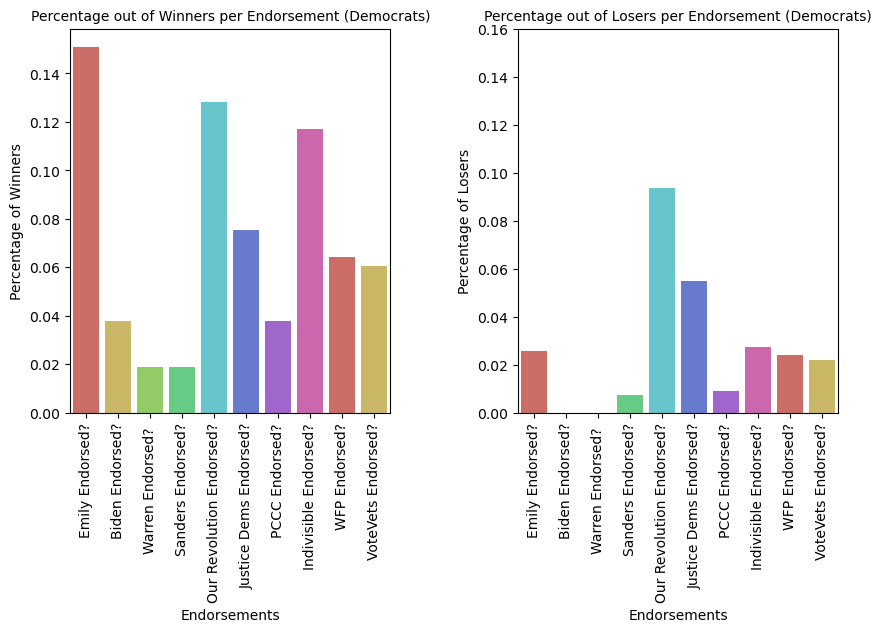

In [50]:
# Plotting Comparative Barchart
fig, ax = plt.subplots(1, 2)
color_palette = sns.color_palette("hls", 8)

# plotting losers
plt1 = sns.barplot(x=dem_losers_endorsed_sum.index, y=dem_losers_endorsed_sum.values, ax=ax[1], palette = color_palette)
plt1.set_ylim(0,0.16)
plt1.set_xticklabels(dem_losers_endorsed_sum.index, rotation=90)
plt1.set(xlabel = "Endorsements", ylabel = "Percentage of Losers")
plt1.set_title("Percentage out of Losers per Endorsement (Democrats)", fontsize=10)

# plotting winners
plt2 = sns.barplot(x=dem_winners_endorsed_sum.index, y=dem_winners_endorsed_sum.values, ax=ax[0], palette = color_palette)
plt2.set_xticklabels(dem_winners_endorsed_sum.index, rotation=90)
plt2.set(xlabel = "Endorsements", ylabel = "Percentage of Winners")
plt2.set_title("Percentage out of Winners per Endorsement (Democrats)", fontsize=10)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.3,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.show()

#### Republicans

In [51]:
# republican candidates
rep_data_1 = rep_data.copy()
rep_data_1['Primary Status'].value_counts()

Lost             516
Advanced         256
On the Ballot      2
Name: Primary Status, dtype: int64

In [52]:
# some data cleaning/manipulating
rep_data_1['winner'] = np.where(rep_data_1['Primary Status'].isin(["Advanced", "On the Ballot"]), True, False)
rep_winner_df = rep_data_1[rep_data_1['winner'] == True]
rep_loser_df = rep_data_1[rep_data_1['winner'] == False]
rep_winners_endorsed = rep_winner_df.filter(regex=".Endorsed?")
rep_losers_endorsed = rep_loser_df.filter(regex=".Endorsed?")

# calculating percentage winners/losers for each endorsement
rep_winners_endorsed_sum = rep_winners_endorsed.sum(axis = 0)/rep_winner_df.shape[0]
rep_losers_endorsed_sum = rep_losers_endorsed.sum(axis=0)/rep_loser_df.shape[0]

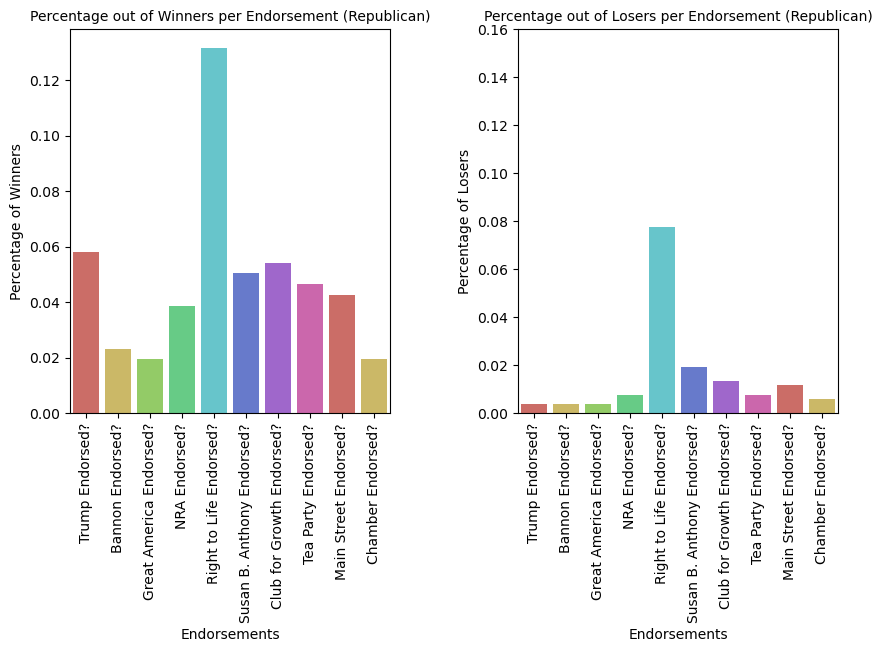

In [53]:
# Plotting Comparative Barchart
fig, ax = plt.subplots(1, 2)
color_palette = sns.color_palette("hls", 8)

# plotting losers
plt3 = sns.barplot(x=rep_losers_endorsed_sum.index, y=rep_losers_endorsed_sum.values, ax=ax[1], palette = color_palette)
plt3.set_ylim(0,0.16)
plt3.set_xticklabels(rep_losers_endorsed_sum.index, rotation=90)
plt3.set(xlabel = "Endorsements", ylabel = "Percentage of Losers")
plt3.set_title("Percentage out of Losers per Endorsement (Republican)", fontsize=10)

# plotting winners
plt4 = sns.barplot(x=rep_winners_endorsed_sum.index, y=rep_winners_endorsed_sum.values, ax=ax[0], palette = color_palette)
plt4.set_xticklabels(rep_winners_endorsed_sum.index, rotation=90)
plt4.set(xlabel = "Endorsements", ylabel = "Percentage of Winners")
plt4.set_title("Percentage out of Winners per Endorsement (Republican)", fontsize=10)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.3,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

fig.show()

#### Data Cleaning

Using the already cleaned datasets from the previous section, the only extra data cleaning/feature engineering I did was add an additional "winners" column to indicate if a certain candidate "advanced" or made it "on the ballot". I then used this column to group "winners" and "losers" into two separate datasets which I compared using a barchart. This data cleaning step will not have a significant impact on our actual model as it was only useful for this EDA section. 

#### Trends

The most notable observation from comparing the winners and losers barchart is that there seems to be an association between endorsements and whether or not a candidate wins the primary elections because the bars, on average, is higher in the winners graph compared to the losers graph. It seems like some of the most significant endorsements for Democrats are Emily, Our Revolution and Indivisible and the most significant one for Republicans is Right to Life. A next step could be to do a little bit more research on these three endorsement groups and come up with a reasonable justification as to why that might be the case. It could also be a good way to perform a sanity check on our EDA conclusion. 

#### Signficance

This visualization is helpful in determining if endorsements is associated with success in the election (win vs loss) hence suggesting a potential answer to the second research question. Additionally, these barcharts could be a good way of determining how much each endorsement impacts the election outcome, providing a good basis on deciding weights for each endorsement for causal inference.